In [1]:
import csv

lines = []
with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

In [2]:
import cv2

images = []
measurements = []
for line in lines[1:]:
    source_path  = line[0]
    filename = source_path.split('/')[-1]
    current_path = './data/IMG/' + filename
    image = cv2.imread(current_path)
    images.append(image)
    measurements.append(float(line[3]))

In [3]:
import numpy as np

X_train = np.array(images)
y_train = np.array(measurements)

In [4]:
def image_normalization(image):
    return ((image.astype(np.float32) - 128) / 128)

images_gray = np.array([image_normalization(image) for image in images])

In [5]:
import keras
from keras import backend as K
from keras.models import *
from keras.layers import *

image_shape = images[0].shape

model = Sequential()
model.add(Conv2D(24, (5,5), strides=(2,2), activation='relu', padding='same', input_shape=image_shape))
model.add(BatchNormalization())
model.add(Conv2D(36, (5,5), strides=(2,2), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(48, (5,5), strides=(2,2), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), strides=(1,1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

Using TensorFlow backend.


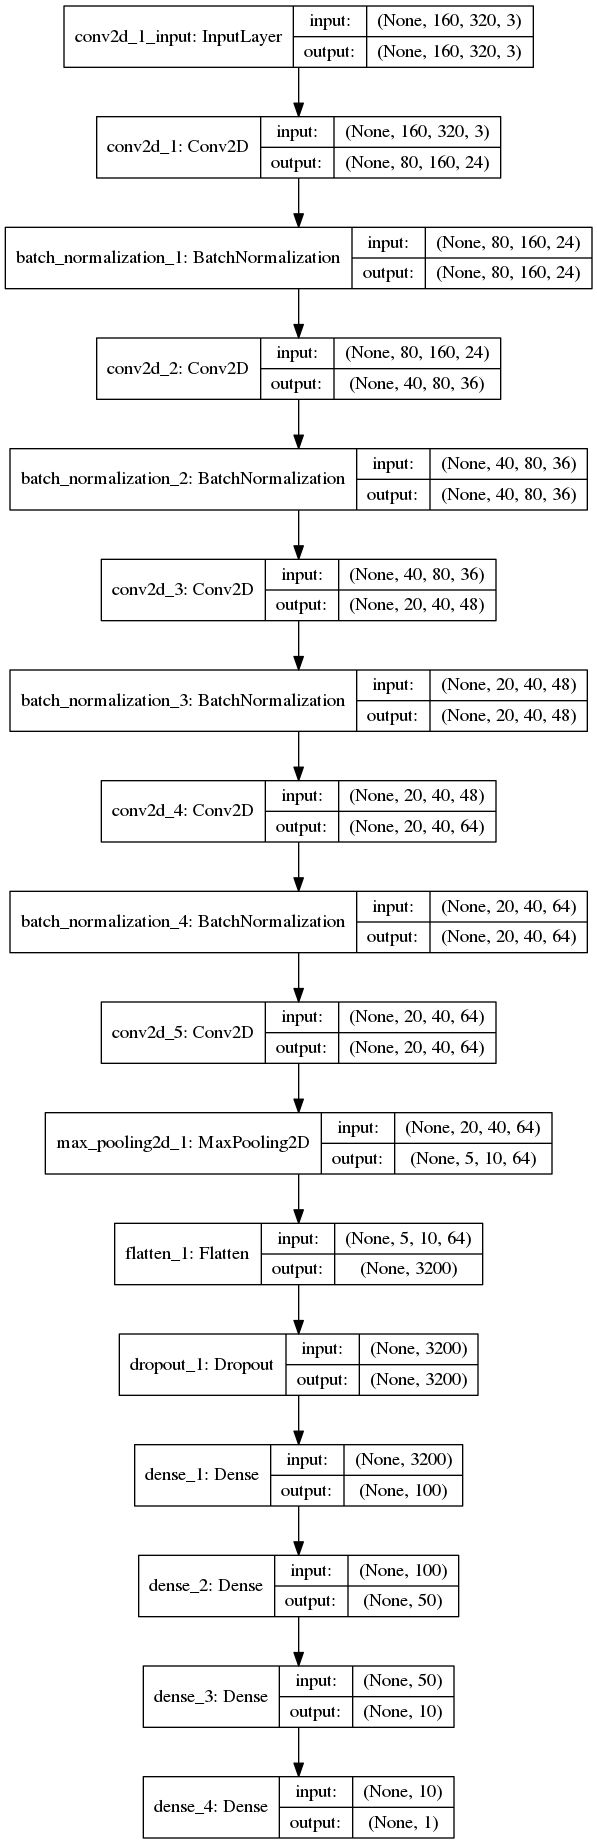

In [6]:
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
from IPython.display import Image
plt.rcParams['figure.figsize'] = (3, 1)
plot_model(model, to_file='model.png', show_shapes=True)
Image(filename = 'model.png')

In [7]:
model.fit(X_train,
         y_train,
         batch_size=64,
         validation_split=0.2,
         epochs=10)

Train on 6428 samples, validate on 1608 samples
Epoch 1/10
6428/6428 [==============================] - 12s - loss: 71.8137 - val_loss: 0.4577
Epoch 2/10
6428/6428 [==============================] - 11s - loss: 0.2028 - val_loss: 0.0682
Epoch 3/10
6428/6428 [==============================] - 11s - loss: 0.1618 - val_loss: 0.0368
Epoch 4/10
6428/6428 [==============================] - 11s - loss: 0.1318 - val_loss: 0.0306
Epoch 5/10
6428/6428 [==============================] - 11s - loss: 0.1130 - val_loss: 0.0317
Epoch 6/10
6428/6428 [==============================] - 11s - loss: 0.0991 - val_loss: 0.0254
Epoch 7/10
6428/6428 [==============================] - 11s - loss: 0.0853 - val_loss: 0.0235
Epoch 8/10
6428/6428 [==============================] - 11s - loss: 0.0760 - val_loss: 0.0221
Epoch 9/10
6428/6428 [==============================] - 11s - loss: 0.0646 - val_loss: 0.0212
Epoch 10/10
6428/6428 [==============================] - 11s - loss: 0.0580 - val_loss: 0.0206


In [8]:
model.save('model.h5')